<a href="https://colab.research.google.com/github/tazeenida/Ethical-AI/blob/feature_collabe_hw2/Case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New Test Accuracy: 47.50%


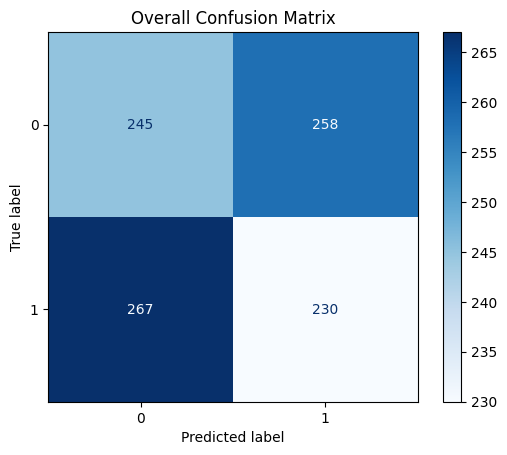

Accuracy for Salary Group 'Medium': 52.40%


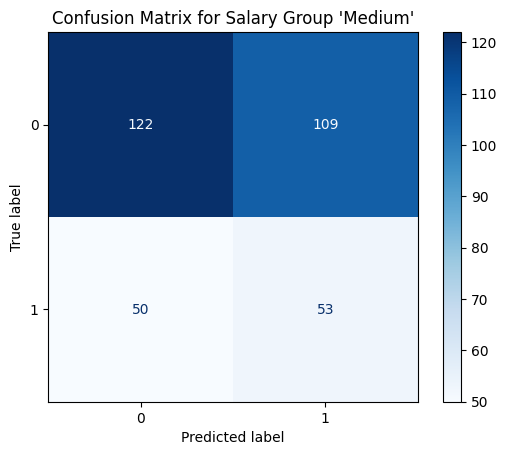

Accuracy for Salary Group 'Low': 43.60%


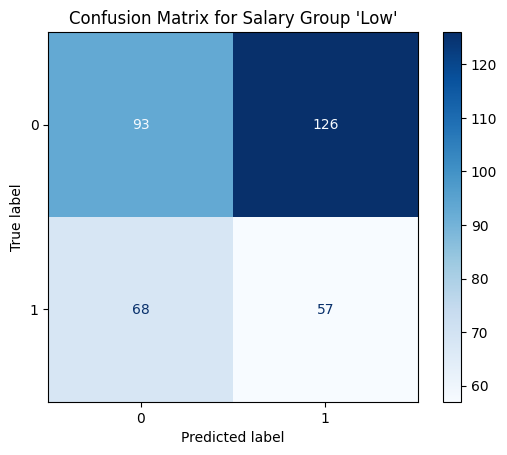

Accuracy for Salary Group 'High': 46.58%


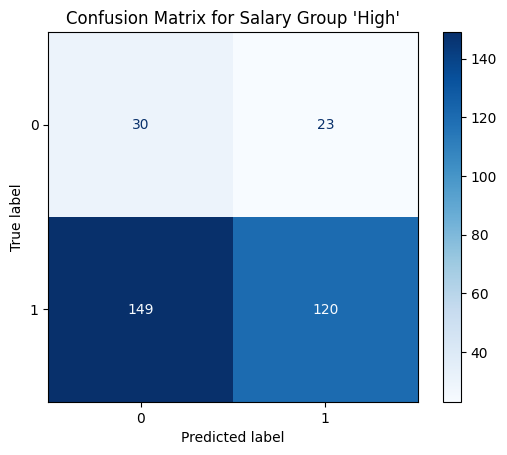

Accuracy for Sex Group '0': 47.13%


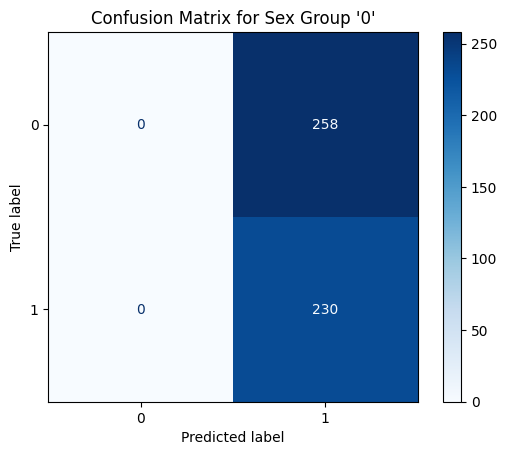

Accuracy for Sex Group '1': 47.85%


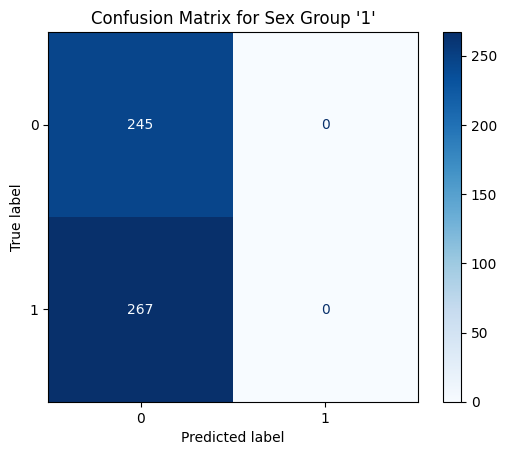

Accuracy for Credit Score Group 'Low': 47.89%


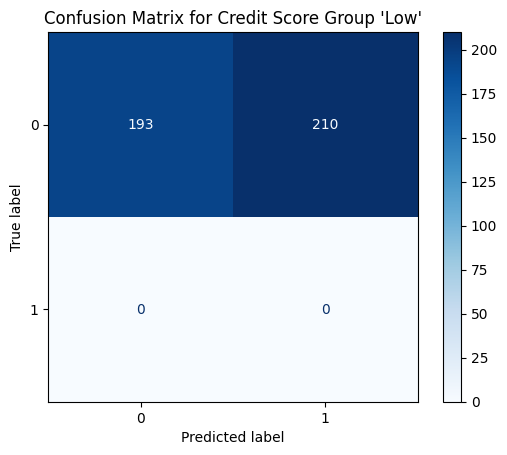

Accuracy for Credit Score Group 'Medium': 48.89%


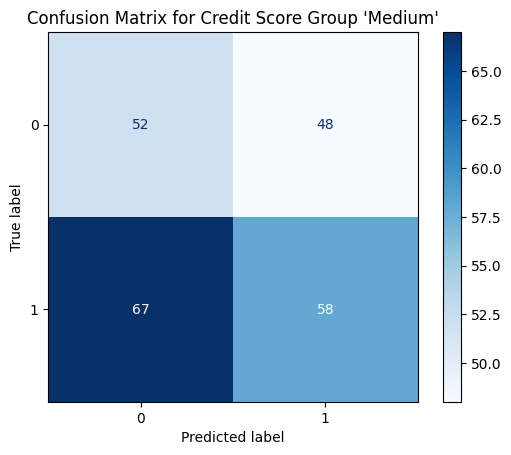

Accuracy for Credit Score Group 'High': 43.97%


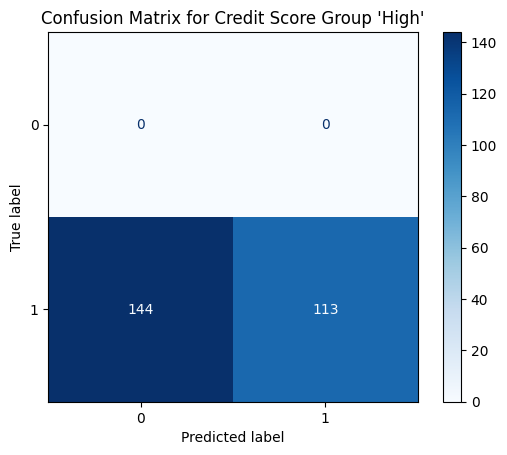

Accuracy for Credit Score Group 'Very High': 51.30%


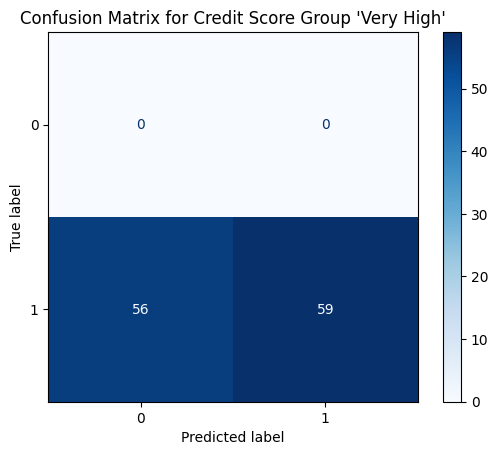

Accuracy for Debt Group 'High': 49.22%


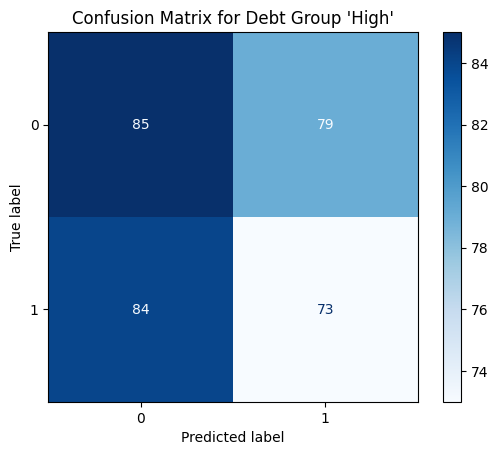

Accuracy for Debt Group 'Very High': 47.71%


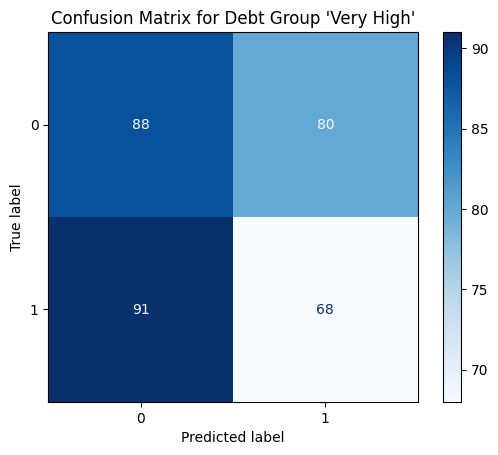

Accuracy for Debt Group 'Medium': 41.54%


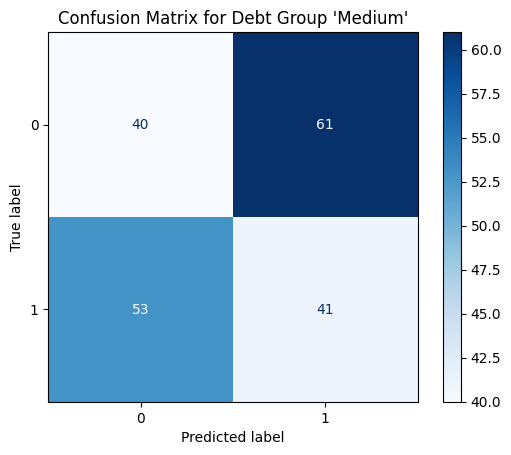

Accuracy for Debt Group 'Low': 49.32%


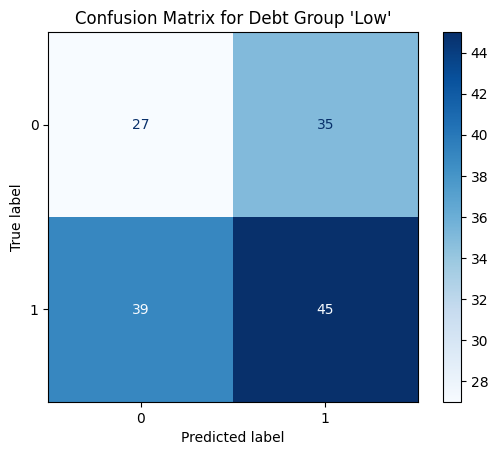

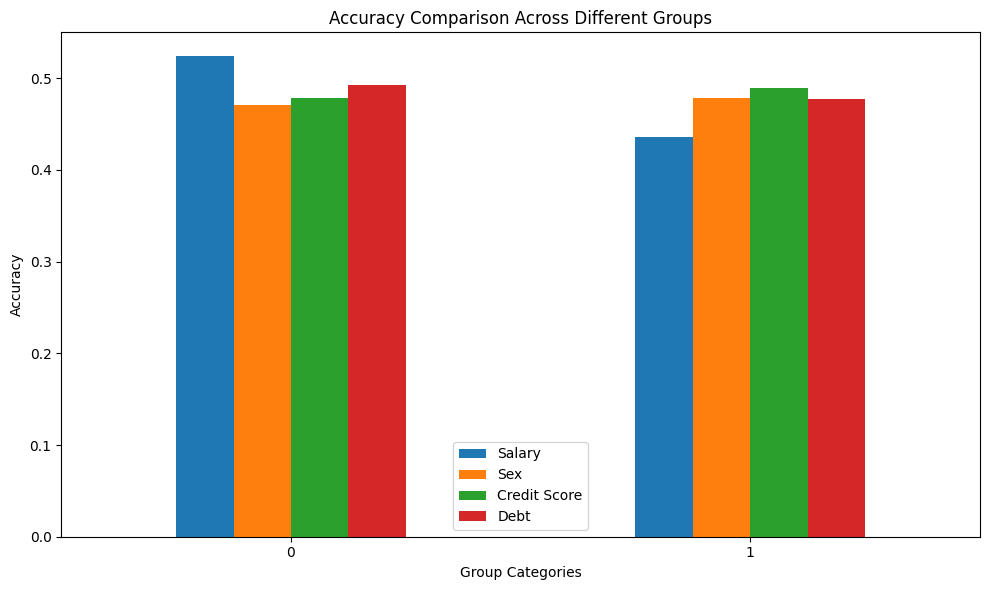


Detailed Bias Findings:
Salary Group Salary: Accuracy = 52.40%
Salary Group Sex: Accuracy = 43.60%
Sex Group Salary: Accuracy = 47.13%
Sex Group Sex: Accuracy = 47.85%
Credit Score Group Salary: Accuracy = 47.89%
Credit Score Group Sex: Accuracy = 48.89%
Debt Group Salary: Accuracy = 49.22%
Debt Group Sex: Accuracy = 47.71%


In [29]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn import preprocessing

# Load Model
with open('BEST_LR_MODEL_EVER.pkl', 'rb') as f:
    clf = pickle.load(f)

# Load Dataset
df = pd.read_csv('test_bias_new.csv').dropna()

# Separate Features and Labels
X = df[['salary', 'sex', 'credit score', 'debt']]
Y = df['approved']

# Normalize Data
norm_X = preprocessing.normalize(X, axis=0)

# Verify Overall Performance
predictions = clf.predict(norm_X)
accuracy = accuracy_score(Y, predictions)
print(f"New Test Accuracy: {accuracy:.2%}")

# Generate Overall Confusion Matrix
cm = confusion_matrix(Y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(Y.unique()))
disp.plot(cmap='Blues')
plt.title("Overall Confusion Matrix")
plt.show()

# Initialize empty lists to track accuracy for different groups
accuracy_scores_for_salary = []
accuracy_scores_for_sex = []
accuracy_scores_for_credit_score = []
accuracy_scores_for_debt = []

# **Check Bias for Salary Groups**
if 'salary' in df.columns:
    # Convert salary into bins: Low, Medium, High (based on percentiles)
    df['salary_category'] = pd.qcut(df['salary'], q=3, labels=['Low', 'Medium', 'High'])

    for group in df['salary_category'].unique():
        subset = df[df['salary_category'] == group]
        X_sub = preprocessing.normalize(subset[['salary', 'sex', 'credit score', 'debt']], axis=0)
        Y_sub = subset['approved']
        sub_preds = clf.predict(X_sub)

        # Show performance per salary group
        accuracy = accuracy_score(Y_sub, sub_preds)
        accuracy_scores_for_salary.append(accuracy)
        print(f"Accuracy for Salary Group '{group}': {accuracy:.2%}")

        # Display Confusion Matrix for the Subgroup
        cm_sub = confusion_matrix(Y_sub, sub_preds)
        disp_sub = ConfusionMatrixDisplay(cm_sub, display_labels=sorted(Y.unique()))
        disp_sub.plot(cmap='Blues')
        plt.title(f"Confusion Matrix for Salary Group '{group}'")
        plt.show()

# Check bias in sex (gender) groups
if 'sex' in df.columns:
    for group in df['sex'].unique():
        subset = df[df['sex'] == group]
        X_sub = preprocessing.normalize(subset[['salary', 'sex', 'credit score', 'debt']], axis=0)
        Y_sub = subset['approved']
        sub_preds = clf.predict(X_sub)

        # Show performance per sex group
        accuracy = accuracy_score(Y_sub, sub_preds)
        accuracy_scores_for_sex.append(accuracy)
        print(f"Accuracy for Sex Group '{group}': {accuracy:.2%}")

        # Display Confusion Matrix for the subgroup
        cm_sub = confusion_matrix(Y_sub, sub_preds)
        disp_sub = ConfusionMatrixDisplay(cm_sub, display_labels=sorted(Y.unique()))
        disp_sub.plot(cmap='Blues')
        plt.title(f"Confusion Matrix for Sex Group '{group}'")
        plt.show()

# Create bins for credit score (low, medium, high, very high)
credit_bins = [0, 600, 700, 800, 900]
credit_labels = ['Low', 'Medium', 'High', 'Very High']
df['credit_score_category'] = pd.cut(df['credit score'], bins=credit_bins, labels=credit_labels)

# Check bias in credit score categories
for group in df['credit_score_category'].unique():
    subset = df[df['credit_score_category'] == group]
    X_sub = preprocessing.normalize(subset[['salary', 'sex', 'credit score', 'debt']], axis=0)
    Y_sub = subset['approved']
    sub_preds = clf.predict(X_sub)

    # Show performance per credit score group
    accuracy = accuracy_score(Y_sub, sub_preds)
    accuracy_scores_for_credit_score.append(accuracy)
    print(f"Accuracy for Credit Score Group '{group}': {accuracy:.2%}")

    # Display Confusion Matrix for the subgroup
    cm_sub = confusion_matrix(Y_sub, sub_preds)
    disp_sub = ConfusionMatrixDisplay(cm_sub, display_labels=sorted(Y.unique()))
    disp_sub.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for Credit Score Group '{group}'")
    plt.show()

# Create bins for debt (low, medium, high, very high)
debt_bins = [0, 20000, 50000, 100000, np.inf]
debt_labels = ['Low', 'Medium', 'High', 'Very High']
df['debt_category'] = pd.cut(df['debt'], bins=debt_bins, labels=debt_labels)

# Filter out NaN debt categories (if any)
df = df.dropna(subset=['debt_category'])

# Check for bias in debt categories
for group in df['debt_category'].unique():
    subset = df[df['debt_category'] == group]

    # Ensure the subset is not empty
    if not subset.empty:
        X_sub = preprocessing.normalize(subset[['salary', 'sex', 'credit score', 'debt']], axis=0)
        Y_sub = subset['approved']
        sub_preds = clf.predict(X_sub)

        # Show performance per debt group
        accuracy = accuracy_score(Y_sub, sub_preds)
        accuracy_scores_for_debt.append(accuracy)
        print(f"Accuracy for Debt Group '{group}': {accuracy:.2%}")

        # Display Confusion Matrix for the subgroup
        cm_sub = confusion_matrix(Y_sub, sub_preds)
        disp_sub = ConfusionMatrixDisplay(cm_sub, display_labels=sorted(Y.unique()))
        disp_sub.plot(cmap='Blues')
        plt.title(f"Confusion Matrix for Debt Group '{group}'")
        plt.show()
    else:
        print(f"No data found for Debt Group '{group}'")

# Ensure all accuracy lists have the same length
min_length = min(len(accuracy_scores_for_salary), len(accuracy_scores_for_sex), len(accuracy_scores_for_credit_score), len(accuracy_scores_for_debt))

# Truncate lists to the same length
accuracy_scores_for_salary = accuracy_scores_for_salary[:min_length]
accuracy_scores_for_sex = accuracy_scores_for_sex[:min_length]
accuracy_scores_for_credit_score = accuracy_scores_for_credit_score[:min_length]
accuracy_scores_for_debt = accuracy_scores_for_debt[:min_length]

# Create a dictionary to store accuracy values for different groups
accuracy_dict = {
    'Salary': accuracy_scores_for_salary,
    'Sex': accuracy_scores_for_sex,
    'Credit Score': accuracy_scores_for_credit_score,
    'Debt': accuracy_scores_for_debt
}

# Convert to DataFrame for better visualization
accuracy_df = pd.DataFrame(accuracy_dict)

# Plot accuracy comparison
accuracy_df.plot(kind='bar', figsize=(10, 6))
plt.title('Accuracy Comparison Across Different Groups')
plt.ylabel('Accuracy')
plt.xlabel('Group Categories')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Detailed bias reporting
print("\nDetailed Bias Findings:")
for group in accuracy_dict:
    for i, value in enumerate(accuracy_dict[group]):
        print(f"{group} Group {accuracy_df.columns[i]}: Accuracy = {value:.2%}")
